# **Graphing Calculator**

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def display_table_and_graph(equation):
    equation = sp.sympify(equation)
    x = sp.symbols('x')

    x_vals = list(range(-10, 11))
    y_vals = [equation.subs(x, val) for val in x_vals]

    ax = plt.subplot()
    ax.set_axis_off()
    title = f"Table of {equation}"

    cols = ('x', 'y')
    rows = list(zip(x_vals, y_vals))

    ax.set_title(title)
    table = ax.table(cellText=[cols] + rows, cellLoc='center', loc='center', colColours=['#f2f2f2']*2)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label=str(equation))
    plt.axhline(0, color='black', linewidth=1.0)
    plt.axvline(0, color='black', linewidth=1.0)
    plt.title("Graph of the Equation")
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.legend()
    plt.grid(True)
    plt.show()

    return "Success"


def solve_system(equation1, equation2):
    eq1_lhs, eq1_rhs = equation1.split('=')
    eq2_lhs, eq2_rhs = equation2.split('=')

    x, y = sp.symbols('x y')

    equation1 = sp.Eq(eval(eq1_lhs), eval(eq1_rhs))
    equation2 = sp.Eq(eval(eq2_lhs), eval(eq2_rhs))

    solution = sp.solve((equation1, equation2), (x, y))

    print(f"X = {solution[x]}, Y = {solution[y]}")

    return "Success"


def plot_intersection(equation1, equation2):
    x = symbols('x')

    eq1 = Eq(eval(equation1), 0)
    eq2 = Eq(eval(equation2), 0)

    solution = solve((eq1, eq2), (x, x))

    if solution:
        intersection_x = solution[x]

        y1 = eval(equation1.replace('x', str(intersection_x)))
        y2 = eval(equation2.replace('x', str(intersection_x)))

        x_vals = np.linspace(intersection_x - 10, intersection_x + 10, 400)
        y1_vals = eval(equation1.replace('x', 'x_vals'))
        y2_vals = eval(equation2.replace('x', 'x_vals'))

        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y1_vals, label=f'Equation 1: {equation1}')
        plt.plot(x_vals, y2_vals, label=f'Equation 2: {equation2}')

        plt.scatter(intersection_x, y1, color='red', label='Intersection')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Intersection of Equations')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f'Intersection point: ({intersection_x}, {y1})')
    else:
        print('No intersection found.')

    return "Success"


def plot_intersection(equation1, equation2):

    def parse_equation(equation):
        equation = equation.replace(' ', '')
        terms = equation.split('*x')
        coefficient = float(terms[0])
        constant = float(terms[1])
        return coefficient, constant

    coef1, const1 = parse_equation(equation1)
    coef2, const2 = parse_equation(equation2)

    x_values = np.linspace(-10, 10, 400)

    y1_values = coef1 * x_values + const1
    y2_values = coef2 * x_values + const2

    plt.plot(x_values, y1_values, label=equation1)
    plt.plot(x_values, y2_values, label=equation2)

    intersection_x = (const2 - const1) / (coef1 - coef2)
    intersection_y = coef1 * intersection_x + const1

    plt.scatter(intersection_x, intersection_y, color='red', label='Intersection')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.grid(True)
    plt.title('Intersection of Equations')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.show()

    return "Success"


def plot_quadratic_roots_and_vertex(a, b, c):
    discriminant = b**2 - 4*a*c

    if discriminant >= 0:

        root1 = (-b + np.sqrt(discriminant)) / (2*a)
        root2 = (-b - np.sqrt(discriminant)) / (2*a)

        vertex_x = -b / (2*a)
        vertex_y = a * vertex_x**2 + b * vertex_x + c

        x = np.linspace(vertex_x - 2, vertex_x + 2, 400)
        y = a * x**2 + b * x + c

        plt.plot(x, y, label=f'{a}x^2 + {b}x + {c}')
        plt.scatter([root1, root2], [0, 0], color='red', label='Roots')
        plt.scatter(vertex_x, vertex_y, color='green', label='Vertex')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()

        plt.grid(True)
        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.title('Quadratic Equation, Roots, and Vertex')
        plt.show()

    else:
        print("The quadratic equation has no real roots.")

    return "Success"


In [ ]:
def menu():
    print("1 Display the graph and a table of values for any \"y=\" equation input")
    print("2 Solve a system of two equations without graphing")
    print("3 Graph two equations and plot the point of intersection")
    print("4 Given a, b and c in a quadratic equation, plot the roots and vertex")
    option = int(input("\nSelect option number: "))

    if option == 1:
        equation = input("\nEnter an equation: (Ex1: 2*x**2 + 3*x + 6 Ex2: 2*x + 3)\n")
        display_table_and_graph(equation)

    elif option == 2:
        equation1 = input("\nEnter first equation: (Ex: 2*x + 3*y = 6)")
        equation2 = input("Enter second equation: (Ex: 2*x + 4*y = 8)")
        solve_system(equation1, equation2)

    elif option == 3:
        equation1 = input("\nEnter first equation: (Ex: 2 * x - 1)")
        equation2 = input("Enter second equation: (Ex: -3 * x + 5)")
        plot_intersection(equation1, equation2)

    elif option == 4:
        a = float(input("Enter the coefficient 'a': "))
        b = float(input("Enter the coefficient 'b': "))
        c = float(input("Enter the coefficient 'c': "))
        plot_quadratic_roots_and_vertex(a, b, c)

    else:
        print("Invalid option")


1 Display the graph and a table of values for any "y=" equation input
2 Solve a system of two equations without graphing
3 Graph two equations and plot the point of intersection
4 Given a, b and c in a quadratic equation, plot the roots and vertex

Select option number: 1

Enter an equation: (Ex1: 2*x**2 + 3*x + 6 Ex2: 2*x + 3)
2*x**2 + 3*x + 6


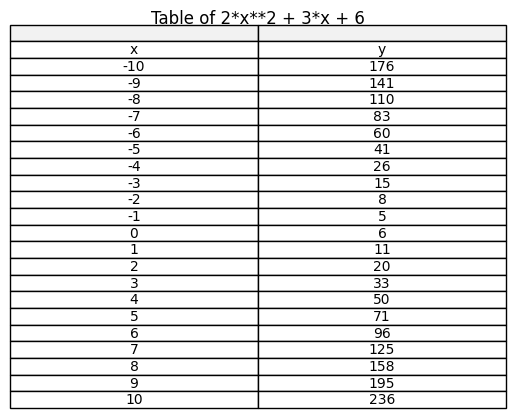

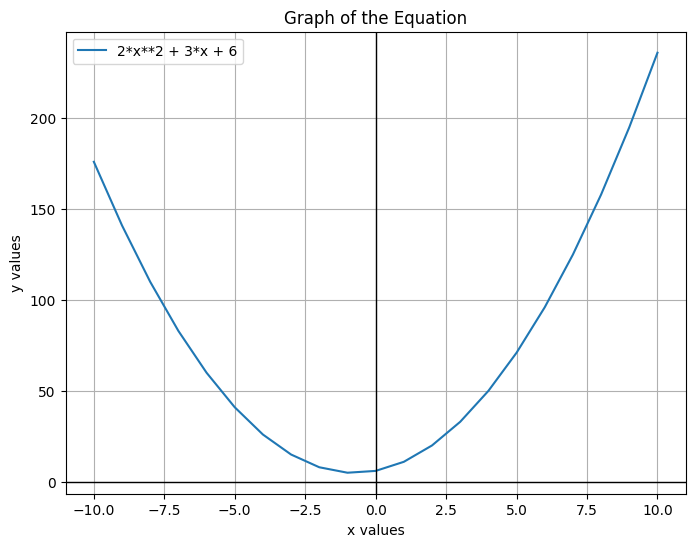

In [ ]:
menu()

1 Display the graph and a table of values for any "y=" equation input
2 Solve a system of two equations without graphing
3 Graph two equations and plot the point of intersection
4 Given a, b and c in a quadratic equation, plot the roots and vertex

Select option number: 1

Enter an equation: (Ex1: 2*x**2 + 3*x + 6 Ex2: 2*x + 3)
2*x + 5


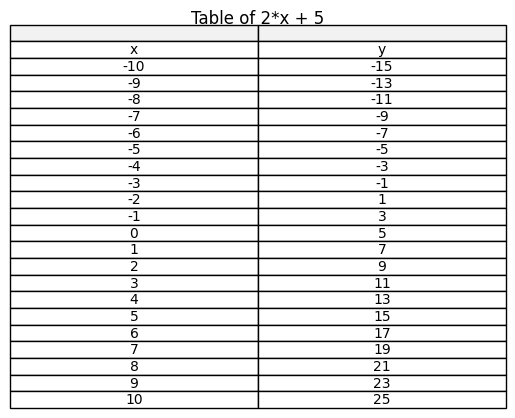

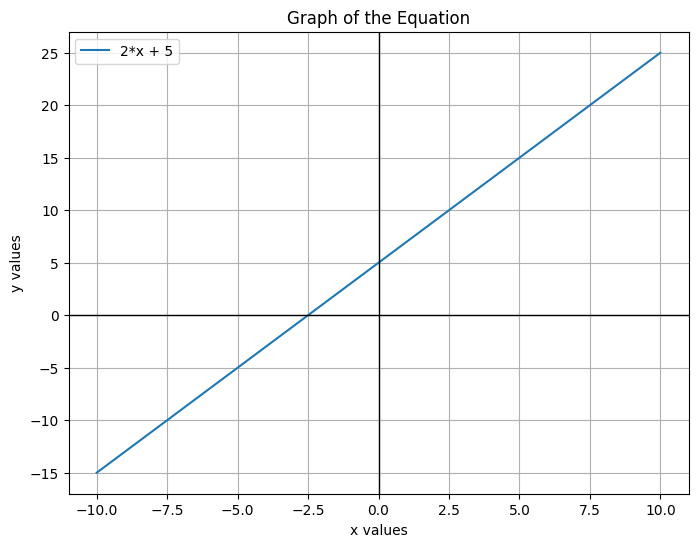

In [ ]:
menu()

In [ ]:
menu()

1 Display the graph and a table of values for any "y=" equation input
2 Solve a system of two equations without graphing
3 Graph two equations and plot the point of intersection
4 Given a, b and c in a quadratic equation, plot the roots and vertex

Select option number: 2

Enter first equation: (Ex: 2*x + 3*y = 6)2*x + 3*y = 6
Enter second equation: (Ex: 2*x + 4*y = 8)2*x + 4*y = 8
X = 0, Y = 2


1 Display the graph and a table of values for any "y=" equation input
2 Solve a system of two equations without graphing
3 Graph two equations and plot the point of intersection
4 Given a, b and c in a quadratic equation, plot the roots and vertex

Select option number: 3

Enter first equation: (Ex: 2 * x - 1)2 * x - 1
Enter second equation: (Ex: -3 * x + 5)-3 * x + 5


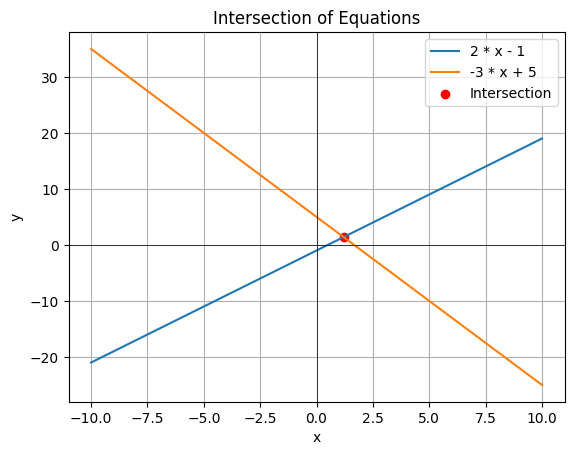

In [ ]:
menu()

1 Display the graph and a table of values for any "y=" equation input
2 Solve a system of two equations without graphing
3 Graph two equations and plot the point of intersection
4 Given a, b and c in a quadratic equation, plot the roots and vertex

Select option number: 4
Enter the coefficient 'a': 2
Enter the coefficient 'b': -2
Enter the coefficient 'c': -15


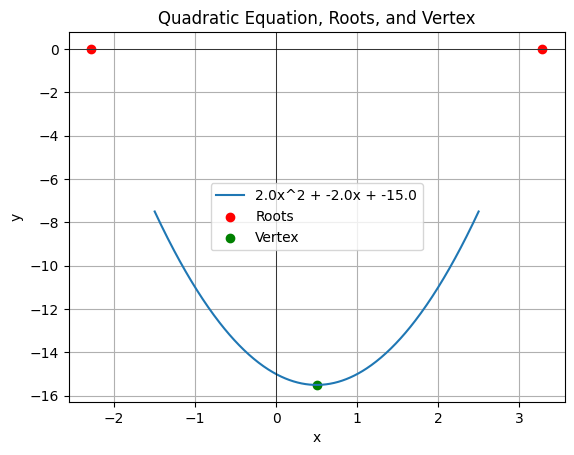

In [ ]:
menu()